# Проверка работы модели триггера на экспериментальных данных 2013 года.

Ко всем кадрам, зарегистрированным в эксперименте 2013 года, применена процедура определения того факта, будет ли данное событие зарегистрировано установкой. Для каждого кадра определяется время срабатывания триггера, исходя из значения порогов, выставленных в эксперименте установкой на момент регистрации данного события. 

Под триггером L3 понимается одновременное превышение порога в находящихся рядом трех ФЭУ. Под триггером G5 - превышение порога в любых пяти ФЭУ мозаики. 

Превышением считается значение сигнала сторого больше значения порога. Превышение считается одновременным, если произошло в течение 40 временных бинов (40 * 25 нс = 1000 нс). 

Проверка проведена на необработанных расшифрованных экспериментальных данных. Выравнивание каналов по светодиодному импульсу не проведено. Значения амплитуд сигналов и порогов - целые числа.

Итог можно сразу прочитать внизу страницы.

#### Чтение данных моделирования триггерного бита

In [1]:
!date
!pwd

Срд Дек 28 18:45:07 MSK 2016
/home/sphere/Analysis/400CheckTrigger/results/all_events


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#from tqdm import tqdm
import math as mt
import numpy as np

In [2]:
# чтение данных обработки экспериментальных событий триггером
datum = pd.read_csv('log.txt', index_col=0, sep=' ')
# количество событий
len(datum)

3813

In [3]:
# начало списка данных
datum[:2]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10676,1,1,201,239,1,3


Значения параметров:

    FlagL3 - сработало ли триггерное условие L3: 0 - нет, 1 - да,
    FlagG5 - сработало ли триггерное условие G5,
    TL3 - время срабатывания триггерного условия L3,
    TG5 - время срабатывания триггерного условия G5,
    TriggerFlag - выработался ли вообще триггер на регистрацию
    TT - условие, по которому выработался триггер. Т.е. какое из условий L3 и G5 наступило раньше.

### Распределение по TL3 и TG5

Рассмотрены все 3813 кадров, зарегистрированные в 2013 г.

In [4]:
print('TriggerFlag:', len(datum[:][datum['TriggerFlag']== 1]))
print('FlagL3:     ', len(datum[:][datum['FlagL3']     == 1]))
print('FlagG5:     ', len(datum[:][datum['FlagL3']     == 1]))

TriggerFlag: 3813
FlagL3:      3813
FlagG5:      3813


In [5]:
AllTrig_l3 = datum['TL3'][datum['TT']==3]
print('TL3 = ',len(AllTrig_l3))
AllTrig_g5 = datum['TG5'][datum['TT']==5]
print('TG5 = ',len(AllTrig_g5))
print(datum['TT'].value_counts());

TL3 =  3140
TG5 =  673
3    3140
5     673
Name: TT, dtype: int64


Во всех 3813 событиях в процессе моделирования "выработался" итоговый триггер TriggerFlag, а также триггеры L3 и G5.

Распределение по триггерам L3 и G5 следующее: в 3140 кадрах первым сработал триггер L3, в 673 кадрах --- G5. 

Построим распределение того триггера, который случился раньше и "вызвал" регистрацию события. Он должен быть в районе 200-300 бина. Однако, наблюдаются триггеры, случившиеся ранее этого интервала. Также есть триггеры, сработавшие в конце кадра на калибровочном сигнале.

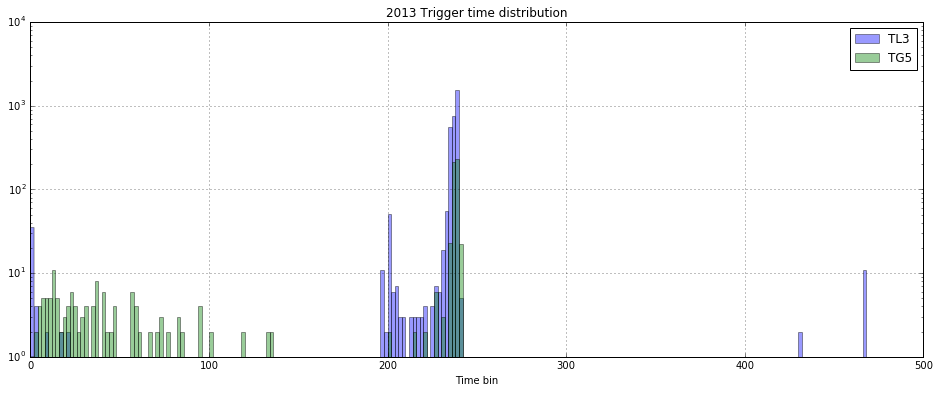

In [6]:
plt.figure(figsize=(16,6))
#plt.hist(datum['TL3'], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
#plt.hist(datum['TG5'], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.hist(AllTrig_l3[:], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(AllTrig_g5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

Посчитаем количество событий с триггерами раньше нужного.

In [7]:
mint = 180
print('TL3 <', mint, ':', len(AllTrig_l3[:][AllTrig_l3 < mint]))
print('TG5 <', mint, ':', len(AllTrig_g5[:][AllTrig_g5 < mint]))

TL3 < 180 : 50
TG5 < 180 : 156


 Раньше нужного триггер L3 "сработал" в 50 из 3140 кадрах (1,5%), а триггер G5 в 156 из 673 кадров (23.2%).

In [8]:
# Посчитаем количество кадров с поздними триггерами
maxt = 300
print('TL3 >', maxt, ':', len(AllTrig_l3[:][AllTrig_l3 > maxt]))
print('TG5 >', maxt, ':', len(AllTrig_g5[:][AllTrig_g5 > maxt]))

TL3 > 300 : 16
TG5 > 300 : 2


Триггер сработал слишком поздно в 18 событиях: L3: 16 из 3140 (0,5%) и G5 в 2 из 673 (0,3%).

Рассмотрим отдельно триггеры в разных типах событий.

#### Чтение списка калибровочных событий

Список калибровочных кадров получен в процессе классификации событий по алгоритму Тимура.

In [9]:
calibr = pd.read_csv('Calibr.2013.txt', index_col=0, sep=' ')
print('Events =',len(calibr))
calibr[:2]

Events = 3813


,Calibr
Event,
10675,0
10676,1


##  Некалибровочные события

In [10]:
# отбор некалибровочных событий
Events = datum[:][calibr['Calibr']==0]
print('NonCalibration events: ', len(Events))
Events[:3]

NonCalibration events:  1937


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10677,1,1,235,236,1,3
10679,1,1,224,233,1,3


In [11]:
# Распределение по триггерам некалибровочных событий
Trig_l3 = Events['TL3'][Events['TT']==3]
print('lenTL3 = ',len(Trig_l3))
Trig_g5 = Events['TG5'][Events['TT']==5]
print('lenTG5 = ',len(Trig_g5))

lenTL3 =  1339
lenTG5 =  598


Из 1937 некалибровочных событий в 1339 первым сработал триггер L3, в 598 - G5.

In [12]:
print('TL3 <', mint, ':', len(Trig_l3[:][Trig_l3 < mint]))
print('TG5 <', mint, ':', len(Trig_g5[:][Trig_g5 < mint]))

TL3 < 180 : 36
TG5 < 180 : 83


В 36+83 некалибровочных кадрах триггер сработал до бина 180. 

Раньше нужного триггер L3 "сработал" в 36 из 1339 кадрах (2.7%), а триггер G5 в 83 из 598 кадров (13.9%).


In [13]:
print('TL3 >', maxt, ':', len(Trig_l3[:][Trig_l3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_g5[:][Trig_g5 > maxt]))

TL3 > 300 : 16
TG5 > 300 : 2


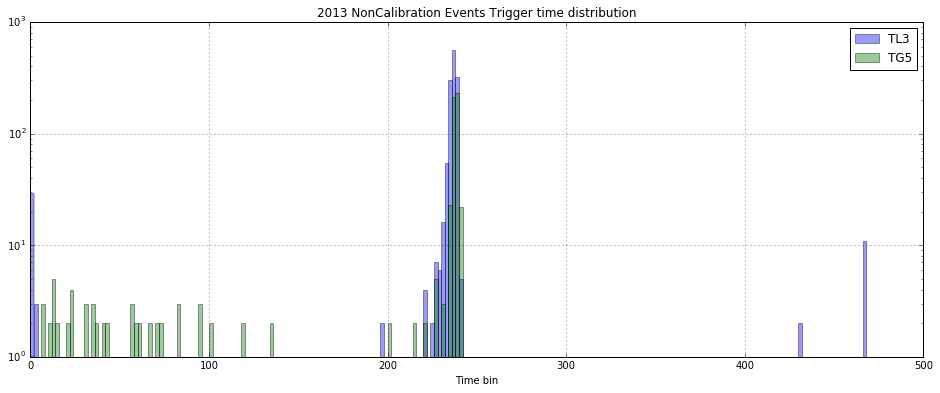

In [14]:
plt.figure(figsize=(16,6))
plt.hist(Events['TL3'][Events['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Events['TG5'][Events['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 NonCalibration Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

#### Кадры с запоздавшими триггерами: 

In [15]:
Trig_l3[:][Trig_l3 > maxt]

Event
10733    467
10831    466
10869    439
10953    432
11018    431
11042    430
11168    467
11302    466
11318    467
11452    467
11534    467
11804    467
11910    467
12076    467
13766    467
13818    459
Name: TL3, dtype: int64

In [16]:
Trig_g5[:][Trig_g5 > maxt]

Event
10897    358
10964    416
Name: TG5, dtype: int64

## Калибровочные события

In [17]:
# отбор калибровочных событий
Calibr=datum[:][calibr['Calibr']==1]
print('Calibration events: ', len(Calibr))
Calibr[:3]

Calibration events:  1839


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10676,1,1,201,239,1,3
10678,1,1,200,238,1,3
10682,1,1,201,239,1,3


In [18]:
# распределение по триггерам
Trig_Calibrl3 = Calibr['TL3'][Calibr['TT']==3]
Trig_Calibrg5 = Calibr['TG5'][Calibr['TT']==5]
print('lenTL3 = ',len(Trig_Calibrl3))
print('lenTG5 = ',len(Trig_Calibrg5))
print('TL3 <', mint, ':', len(Trig_Calibrl3[:][Trig_Calibrl3 < mint]))
print('TG5 <', mint, ':', len(Trig_Calibrg5[:][Trig_Calibrg5 < mint]))
print('TL3 >', maxt, ':', len(Trig_Calibrl3[:][Trig_Calibrl3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_Calibrg5[:][Trig_Calibrg5 > maxt]))

lenTL3 =  1794
lenTG5 =  45
TL3 < 180 : 7
TG5 < 180 : 44
TL3 > 300 : 0
TG5 > 300 : 0


В 1794 калибровочных событиях первым сработал триггер L3, в 45 - G5.

В 51 калибровочных кадрах триггер сработал до бина 180.
Раньше нужного триггер L3 "сработал" в 7 из 1794 кадрах (0.4%), а триггер G5 в 44 из 45 кадров (98%). Поздних триггеров нет.

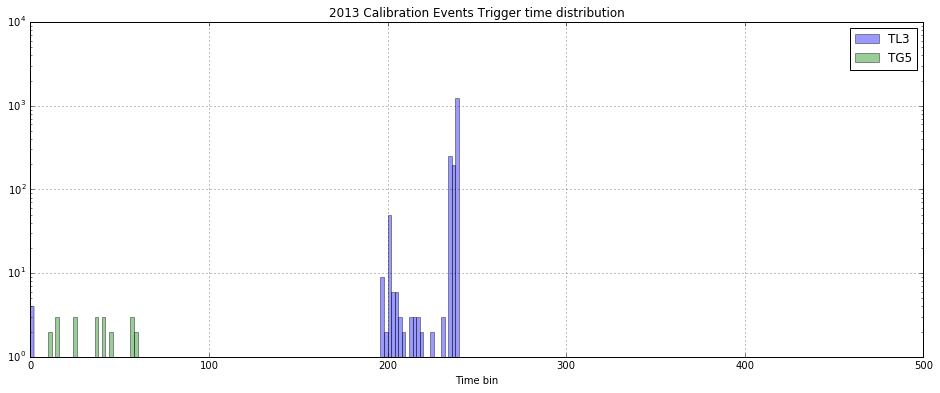

In [19]:
plt.figure(figsize=(16,6))
plt.hist(Calibr['TL3'][Calibr['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Calibr['TG5'][Calibr['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Calibration Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

In [20]:
# номера калибровочных событий с малыми временами триггера L3
Trig_Calibrl3[:][Trig_Calibrl3 < mint]
#Trig_Calibrg5[:][Trig_Calibrg5 < mint]

Event
10728     0
10786     0
10941     2
11115     0
11155     0
11593     8
11601    20
Name: TL3, dtype: int64

## Cобытия-кандидаты ШАЛ

#### Чтение списка событий-кандидатов ШАЛ

Используется файл Димы timur2013.txt от 22.09.2016 г с результатом обработки экспериментальных событий по 12 версии. В нём 482 события.

In [21]:
dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep=' ')
eas = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS']=int(1)
eas[:3]

,EAS
Number,
10675,1
10677,1
10685,1


In [22]:
alll=datum.join(eas)
alll[:3]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT,EAS
Event,,,,,,,
10675,1,1,238,238,1,3,1.0
10676,1,1,201,239,1,3,NaN
10677,1,1,235,236,1,3,1.0


In [23]:
# отбор событий EAS из полного списка
EAS = alll[:][alll['EAS']==1]
print('EAS events: ', len(EAS))
EAS[:3]

EAS events:  482


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT,EAS
Event,,,,,,,
10675,1,1,238,238,1,3,1.0
10677,1,1,235,236,1,3,1.0
10685,1,1,205,238,1,3,1.0


#### Анализ триггеров событий ШАЛ

In [24]:
Trig_EASl3 = EAS['TL3'][EAS['TT']==3]
Trig_EASg5 = EAS['TG5'][EAS['TT']==5]
print('EAS events: ', len(EAS))
print('TL3 = ',len(Trig_EASl3))
print('TG5 = ',len(Trig_EASg5))
print('TL3 <', mint, ':', len(Trig_EASl3[:][Trig_EASl3 < mint]))
print('TG5 <', mint, ':', len(Trig_EASg5[:][Trig_EASg5 < mint]))
print('TL3 >', maxt, ':', len(Trig_EASl3[:][Trig_EASl3 > maxt]))
print('TG5 >', maxt, ':', len(Trig_EASg5[:][Trig_EASg5 > maxt]))

EAS events:  482
TL3 =  464
TG5 =  18
TL3 < 180 : 1
TG5 < 180 : 0
TL3 > 300 : 5
TG5 > 300 : 0


В 464 "событиях ШАЛ" первым сработал триггер L3, в 18 - G5.
Раньше нужного триггер L3 "сработал" только в 1 из 464 кадрах (0,2%). Ранних триггеров G5 нет.

Но есть 5 поздних триггеров L3. Т.е. 5 событий, в которых триггер вырабатывается только на калибровочном всплеске в конце кадра.

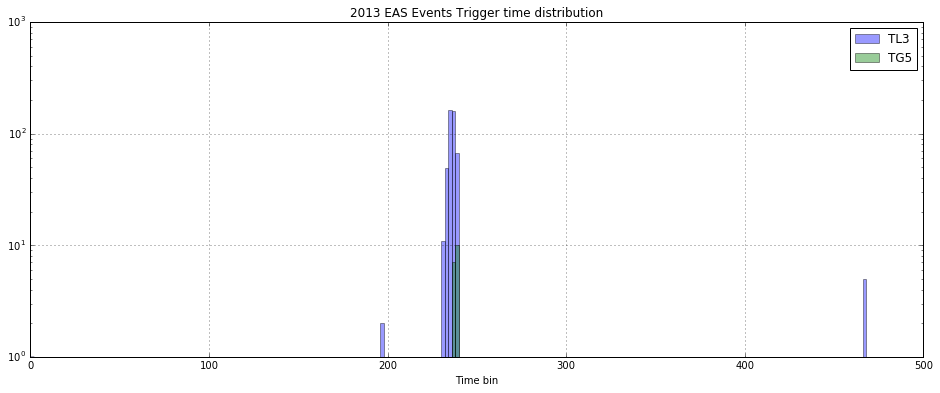

In [25]:
plt.figure(figsize=(16,6))
plt.hist(EAS['TL3'][EAS['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(EAS['TG5'][EAS['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 EAS Events Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

In [26]:
# номера калибровочных событий с малыми временами триггера
Trig_EASl3[:][Trig_EASl3 < mint]

Event
11544    0
Name: TL3, dtype: int64

In [27]:
# номера калибровочных событий с большими временами триггера
Trig_EASl3[:][Trig_EASl3 > maxt]

Event
11168    467
11302    466
11318    467
11452    467
11534    467
Name: TL3, dtype: int64

Из этих событий в утвержденном списке вручную отобранных событий есть одно событие 11168. Событий 11302, 11318, 11452, 11534 нет в списке.

Таким образом, из событий ШАЛ через модель триггера некорректно проходят два ливня:
11168 - триггер вырабатывается только на калибровочном всплеске, 
11544 - вырабатывается в самом начале кадра.

In [28]:
# все параметры для события 11168
EAS.ix[11168]

FlagL3           1.0
FlagG5           1.0
TL3            467.0
TG5            468.0
TriggerFlag      1.0
TT               3.0
EAS              1.0
Name: 11168, dtype: float64

In [29]:
# все параметры для события 11544
EAS.ix[11544]

FlagL3         1.0
FlagG5         1.0
TL3            0.0
TG5            0.0
TriggerFlag    1.0
TT             3.0
EAS            1.0
Name: 11544, dtype: float64

In [30]:
# все параметры для события 10733
datum.ix[10733]

FlagL3           1
FlagG5           1
TL3            467
TG5            467
TriggerFlag      1
TT               3
Name: 10733, dtype: int64

# Итоги

Модель триггера проверена на экспериментальных данных 2013 г.

Во всех 3813 экспериментальных событиях в процессе моделирования "выработался" итоговый триггер TriggerFlag, а также триггеры L3 и G5.
Раньше нужного триггер L3 "сработал" в 50 из 3140 кадров (1,5%), а триггер G5 в 156 из 673 кадров (23.2%). Триггер сработал слишком поздно в 18 событиях: для L3 в 16 из 3140 (0,5%) и G5 в 2 из 673 (0,3%). Все поздние события - некалибровочные.

Калибровочными считаются 1839 кадров. В 51 из них триггер сработал до бина 180. Раньше нужного триггер L3 "сработал" в 7 из 1794 кадрах (0.4%), а триггер G5 в 44 из 45 кадров (98%).

В  1937 некалибровочных событиях раньше нужного триггер L3 "сработал" в 36 из 1339 кадров (2.7%), а триггер G5 в 83 из 598 кадров (13.9%). Поздних триггеры в 18 событиях: L3: 16 из 1339 (1,2%) и G5 в 2 из 598 (0,3%).

Из 482 событий, классифицированных как ШАЛ, В 464 кадрах первым сработал триггер L3, в 18 - G5. Раньше нужного триггер L3 "сработал" только в 1 из 464 событий (0,2%) с номером 11544. Ранних триггеров G5 нет. Но есть событие 11168, в котором триггер вырабатывается только на калибровочном всплеске.

Результаты представлены в виде таблицы для удобства восприятия.

\begin{array}{|c|r|r|r|r|r|r|r|r|r|r|}
\hline
Trig & All  & All< 180   & Calibr & Cal< 180 & NoCal & NC< 180 & NC>300 & EAS & EAS < 180 & EAS > 300\\
\hline 
L3  & 3140 &  50  (1.5\%) & 1794 & 7  (0.4\%) & 1339 & 36 (2.7\%) &16 (1.2\%) & 464 & 1(0.2\%) & 0 \\ \hline 
G5  &  673 & 156  (23\%)  &   45 & 44 (98\%)  &  598 & 83 (14\%)  & 2 (0.3\%) &  18 & 0        & 5 \\ \hline 
All & 3813 & 206  (5.4\%) & 1839 & 51 (2.7\%) & 1937 &119 (6.1\%))&18 (0.9\%) & 482 & 1(0.2\%) & 5 \\ 
\hline
\end{array}

|Trig| All  | All< 180|All>300|| Calibr | Cal< 180 || NoCal| NC< 180 | NC>300 || EAS | EAS< 180 | EAS>300| 
| :- |----: | -------:| --:   ||----: |    ----:   ||----: |  ----:     | ----:     ||----:|   ----:  | -:|
|L3  | 3140 |  50 (1.5%) | 16|| 1794 |  7 (0.4%) || 1339 | 36 (2.7%) |16 (1.2%) || 464 | 1(0.2%) | 0 | 
|G5  |  673 | 156 (23%)  |  2||   45 | 44 (98%)  ||  598 | 83 (14%)  | 2 (0.3%) ||  18 | 0       | 5 |
|All | 3813 | 206 (5.4%) | 18|| 1839 | 51 (2.7%) || 1937 |119 (6.1%))|18 (0.9%) || 482 | 1(0.2%) | 5 |

К недостаткам данной работы относится обработка событий с невыравненными по светодиодному импульсу каналами. Срабатывание на нулевом временном бине может быть объяснено шумами, имеющимися в некоторых кадрах в первых бинах. Можно исправить эти недочеты и заново проверить работу триггера.

##### Можно ли считать такой триггер удовлетворительным?